# OCR_detected_license_plate_using_Tensorflow
## Imports

In [64]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
import random

from distutils.version import StrictVersion
from collections import defaultdict
from io import StringIO
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import pytesseract

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
tf.keras.backend.set_session(tf.Session(config=config))

## Env setup

In [65]:
# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops

# This is needed to display the images.
%matplotlib inline

from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

In [66]:
def yo_make_the_conversion(img_data, count):
    img = img_data
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.threshold(gray, 0, 255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    gray = cv2.medianBlur(gray, 3)
    path_png='png_tesseract'
    count += 1
    filename = os.path.join(path_png,'image{}.png'.format(count))
    cv2.imwrite(filename, gray)
    return filename

In [67]:
def check_array(tex):
    side=tex
    az='ABCDEFGHIJKLMNOPQRSTUVWXYZ1234567890'
    i=0
    yo=len(az)
    txt=''
    for i in range(0,yo):
        if side==az[i]:
            txt=az[i]
            break
    return txt   

In [68]:
def catch_rectify_plate_characters(text):
    tex = text
    out1=[]
    size=len(tex)
    for i in range(0,size):
      if tex[i]==check_array(tex[i]):
        out1.append(tex[i])
    yup=''.join(str(e) for e in out1)    
    return yup

In [69]:
MODEL_NAME = 'number_plate'
PATH_TO_CKPT = MODEL_NAME + '/graph-200000/frozen_inference_graph.pb'
PATH_TO_LABELS = os.path.join('training', 'object-detection.pbtxt')
NUM_CLASSES = 1

### Load a (frozen) Tensorflow model into memory.

In [70]:
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

In [71]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

## Detection

In [72]:
PATH_TO_TEST_IMAGES_DIR = 'png_tesseract/test_ram'
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'image{}.JPEG'.format(i)) for i in range(0,15) ]
IMAGE_SIZE = (12, 8)
TEST_DHARUN=os.path.join('number_plate')
count = 0

CHARCTER RECOGNITION :  HR696969


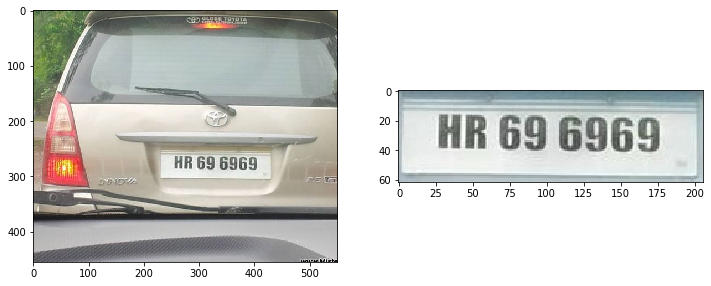

CHARCTER RECOGNITION :  TN07BU5427


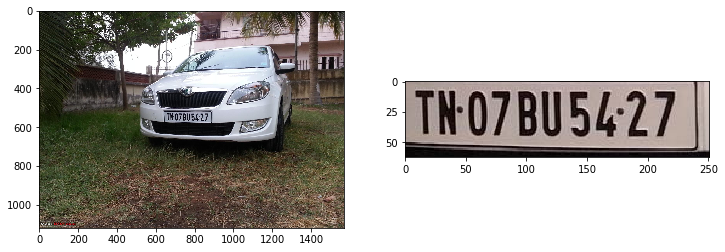

CHARCTER RECOGNITION :  HR26DK0830


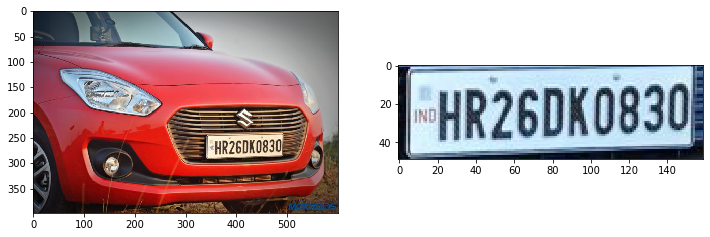

CHARCTER RECOGNITION :  DL7CN5617


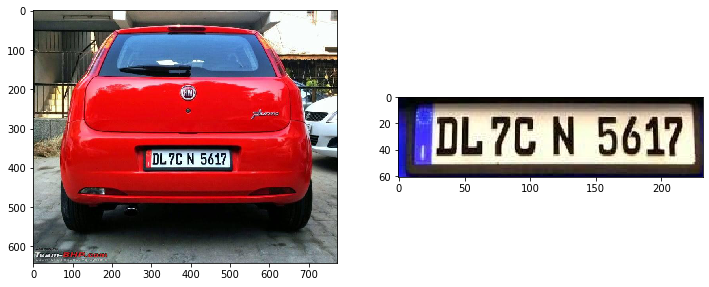

CHARCTER RECOGNITION :  DL3CAY9324


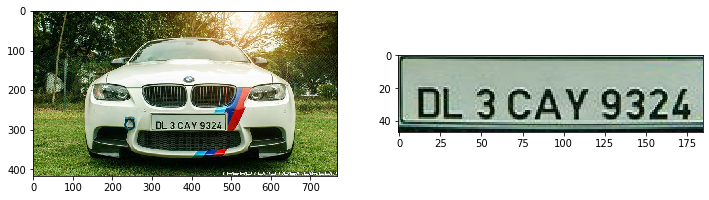

CHARCTER RECOGNITION :  HR99BJ6662


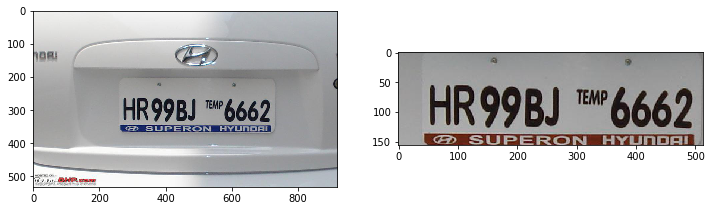

CHARCTER RECOGNITION :  GJW115A1138


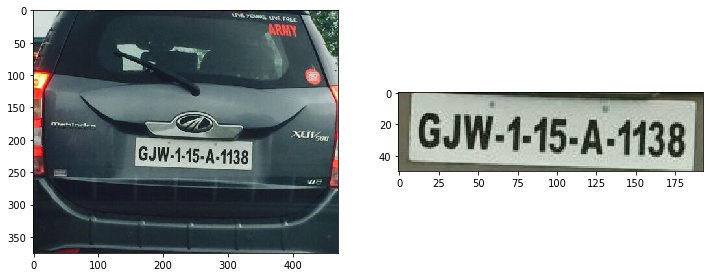

CHARCTER RECOGNITION :  DL12CG6648


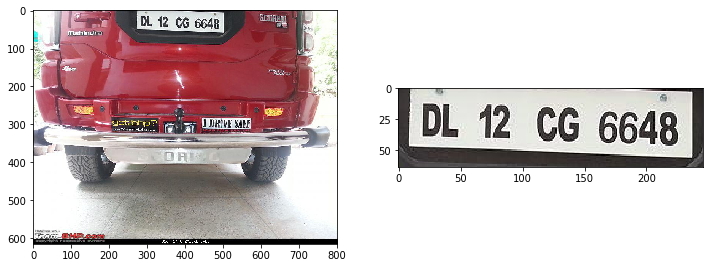

CHARCTER RECOGNITION :  UP14CP6748


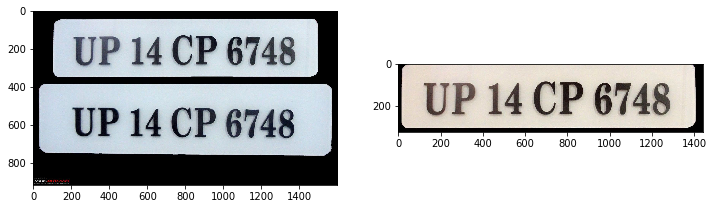

CHARCTER RECOGNITION :  HR26BR9044


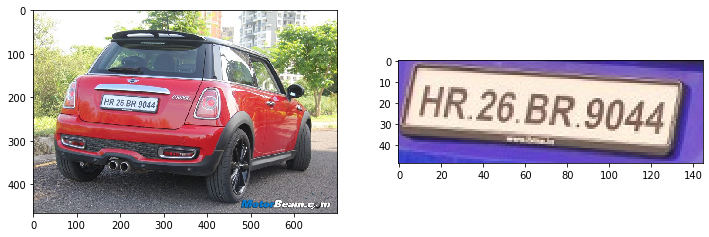

CHARCTER RECOGNITION :  MH20CS9817


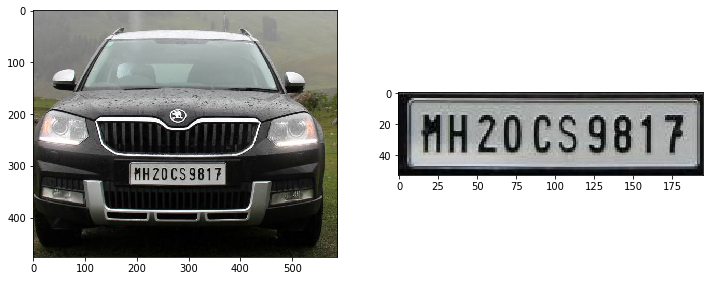

CHARCTER RECOGNITION :  TN38MG6162


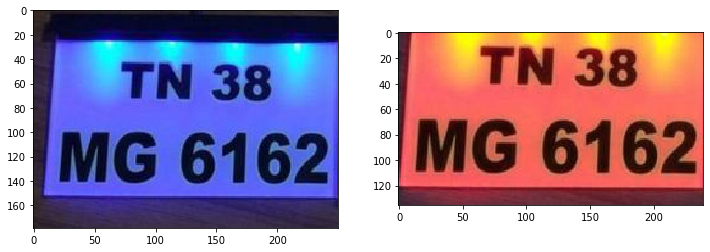

CHARCTER RECOGNITION :  TN38BY4191


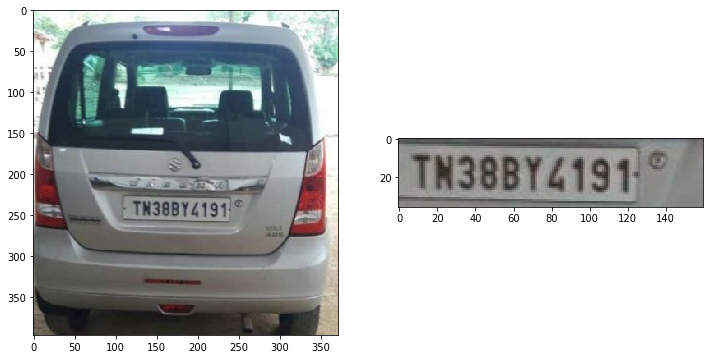

CHARCTER RECOGNITION :  DL3CAY2231


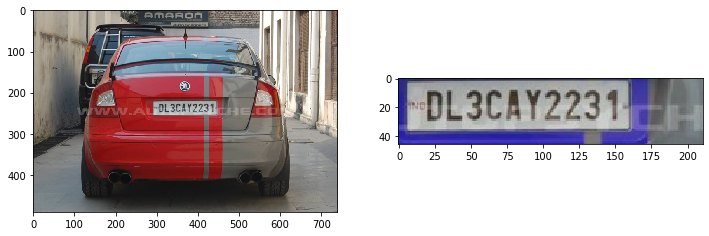

CHARCTER RECOGNITION :  DL3CBF3907


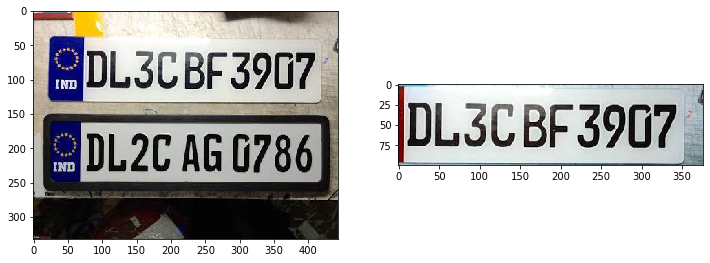

In [77]:
with detection_graph.as_default():
  with tf.Session(graph=detection_graph) as sess:
    image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
    detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
    detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
    detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
    num_detections = detection_graph.get_tensor_by_name('num_detections:0')

    for image_path in TEST_IMAGE_PATHS:
      image = Image.open(image_path) 
      image_np = cv2.imread(image_path,1)
      image_np_expanded = np.expand_dims(image_np, axis=0)
      (boxes, scores, classes, num) = sess.run(
          [detection_boxes, detection_scores, detection_classes, num_detections],
          feed_dict={image_tensor: image_np_expanded})
      ymin = boxes[0,0,0]
      xmin = boxes[0,0,1]
      ymax = boxes[0,0,2]
      xmax = boxes[0,0,3]
      (im_width, im_height) = image.size
      (xminn, xmaxx, yminn, ymaxx) = (xmin * im_width, xmax * im_width, ymin * im_height, ymax * im_height)
      cropped_image = tf.image.crop_to_bounding_box(image_np, int(yminn), int(xminn),int(ymaxx - yminn), int(xmaxx - xminn))
      img_data = sess.run(cropped_image)
      count = 0
      
      config = ('-l eng --oem 1 --psm 3')
      filename = yo_make_the_conversion(img_data, count)

      pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR'
      pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
      text = pytesseract.image_to_string(img_data,config=config)
      print('CHARCTER RECOGNITION : ',catch_rectify_plate_characters(text))
      vis_util.visualize_boxes_and_labels_on_image_array(
          image_np,
          np.squeeze(boxes),
          np.squeeze(classes).astype(np.int32),
          np.squeeze(scores),
          category_index,
          use_normalized_coordinates=True,
          line_thickness=5)
      
      
      plt.figure(figsize=IMAGE_SIZE)
      plt.subplot(1,2,1)
      plt.imshow(image)
      plt.subplot(1,2,2)
      plt.imshow(img_data)
      plt.show()